In [1]:
%matplotlib inline

from __future__ import division

import time

import numpy as np

import part1_utils
reload(part1_utils)
from part1_utils import test_hypothesis, test_quadLoss, plot_1D, plot_f, load_ee_training, ee_evaluate

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

<h1> Supervised Machine Learning </h1>
In this project, we are going to get our hands dirty with some of the basic building blocks in supervised machine learning. All together, a supervised learning problem is defined by three components: <it>inputs and outputs, a hypothesis class,</it> and <it>a loss function.</it> Let's go over each of these.

<h3>Inputs and Outputs</h3>
In each application of ML, one of the most important questions to answer is what type problem you want to solve.  When we were categorizing images, our <it>inputs</it> were color images and our <it>outputs</it> were image categories (dog, cat, chair...etc). The inputs and outputs determine what kind of dataset we should collect. Next, we'll look at <it>regression</it> where the output and input is a single real number.

<h3>Hypothesis Class</h3>
The actual work of classifing images above was done by the neural network that you loaded above. More generally, we use a <it>predictor</it> or <it>hypothesis</it> to represent the mapping from inputs to outputs. The <it>hypothesis class</it> is the group of all input->output mappings we will consider as outputs of our supervised machine learning algorithm. The term <it>neural network</it> actually refers to a (somewhat complicated) hypothesis class that has led to recent progress in image and audio classification. We'll get to that tomorrow. In the next excersize, we'll focus on the simpler hypothesis class of <it>linear</it> functions.

<h3>Loss Function</h3>
Once we know what inputs and outputs to consider and what predictors we can use, we need to know how to pick the 'best' predictor. There are lots of ways to classify images in to categories but many of these will be nonsense or random. The <it>loss function</it> is what defines what it means to make a prediction correctly. It takes as input a predicted output and a labelled, or true, output and tells you how much of a mistake the predictor made. If the loss is high, then the prediction is a bad prediction. In image classification, the loss function takes in a predicted label and a true label. It gives back one if the two labels are different and 0 if they are the same. When we do regression, we'll use the squared distance between the predicted number and the true number as the loss. 

In [2]:
## Implement a function that takes as input the contants (w, w_0) and an input (x) for the line y = w * x + w_0
## and compute the corresponding y value
def hypothesis(w, w0, x):
    """Replace this with your code"""
    return w * x + w0 

print "testing hypothesis"
result = test_hypothesis(hypothesis)
print "Success?:\t{}".format(result)

testing hypothesis
Success?:	True


Now that we've implemented a hypothesis function, we can generate some data! We'll create some random x values and a random set of "true" weights for our function. We can use this to compute the labels for these points. 

3 1


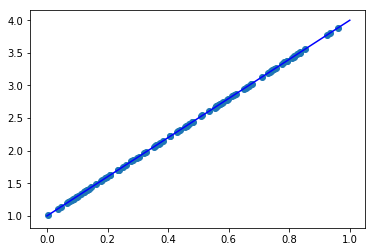

In [3]:
## generate some random x values between 0 and 1
x_vals = np.random.rand(100)
w_true, w0_true = (3, 1)
print w_true, w0_true
y_vals = []
for x in x_vals:
    y_vals.append(hypothesis(w_true, w0_true, x))

## Compare that plot with a plot of the line
plot_1D(w_true, w0_true, x_vals, y_vals)

We usually observe 'noisy' data --- data that doesn't exactly fit our model. This could be because of faulty sensors or just random chance. Next, you'll write a function that will let us generate data from a noisy version of our hypothesis. 

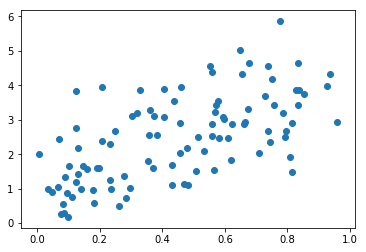

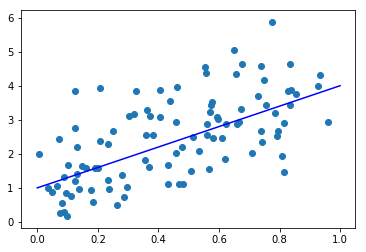

In [4]:
def noisy_hypothesis(w, w0, x):
    """
    compute y = w * x + w0 + e
    e is a random number generated with np.random.normal()
    """
    return w*x + w0 + np.random.normal()

## generate some noisy evaluations
y_vals_noisy = []
for x in x_vals:
    y_vals_noisy.append(noisy_hypothesis(w_true, w0_true, x))

## create a scatter plot of the noisy data
plt.scatter(x_vals, y_vals_noisy)
## plotting with the line in the background
plot_1D(w_true, w0_true, x_vals, y_vals_noisy)

In regression, we start with data like this and we have to figure out the weights that generated the data. Next, we have some data that we generated with the same process as above. Using the plotting code we have given you, try to figure out the correct weights for yourself. 

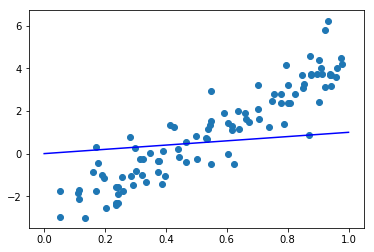

In [5]:
# Weight Fitting 0
x_0 = np.load('x_0.npy')
y_0 = np.load('y_0.npy')

## Replace with your estimates
w_0, w0_0 = 1, 0

plot_1D(w_0, w0_0, x_0, y_0)

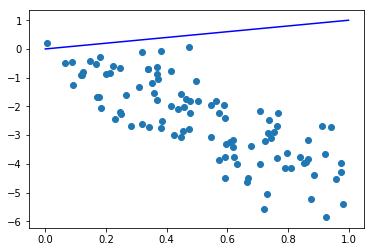

In [6]:
# Weight Fitting 1
x_1 = np.load('x_1.npy')
y_1 = np.load('y_1.npy')

## Replace with your estimates
w_1, w0_1 = 1, 0

plot_1D(w_1, w0_1, x_1, y_1)

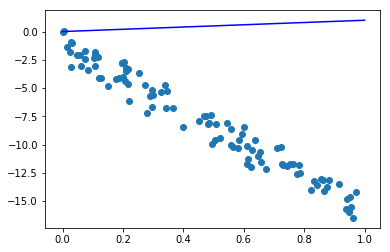

In [7]:
# Weight Fitting 2
x_2 = np.load('x_2.npy')
y_2 = np.load('y_2.npy')

## Replace with your estimates
w_2, w0_2 = 1, 0

plot_1D(w_2, w0_2, x_2, y_2)

Next, we need to figure out a better way to tell if our guessed weights are good (instead of just using our eyes). This is the job of the <it>loss function</it>. It takes two inputs, a guess and a true value, and tells us how much our guess missed by. In linear regression, we use squared distance to measure the loss associated with a guess. If our guess is close, but not quite right, we'll get a small penalty. However, if we miss by a lot we'll pay a big price. Next, we'll write a function that'll let us evaluate how well a set of weights does.

In [8]:
## Implement a function that takes as input a predicted y value y_guess and a true output value y_true
## and returns the loss that guess would incur: L(y_guess, y_true) = (y_guess - y_true)**2
def quad_loss(y_guess, y_true):
    """Replace with your code"""
    return np.power(y_guess - y_true, 2)
    return 0

## Implement a function that takes as input weights, a list of inputs, and a list of labels (desired outputs)
## and computes the loss over the whole dataset
## Hint: you should be able to re-use your answers from before
def dataset_loss(w, w0, x_vals, y_vals):
    """Replace with your code"""
    return np.sum([quad_loss(y, hypothesis(w, w0, x)) for x, y in zip(x_vals, y_vals)])
    return 0

In [9]:
## Let's test out how well your estimates from the questions above did
l_0 = dataset_loss(w_0, w0_0, x_0, y_0)
print "Loss for question 0: {}".format(l_0)

l_1 = dataset_loss(w_1, w0_1, x_1, y_1)
print "Loss for question 1: {}".format(l_1)

l_2 = dataset_loss(w_2, w0_2, x_2, y_2)
print "Loss for question 2: {}".format(l_2)

Loss for question 0: 391.727622413
Loss for question 1: 1160.39156526
Loss for question 2: 9077.30425873


Using the dataset loss, see if you can find weights for each problem that reduce the total amount of loss.

Loss:	391.727622413


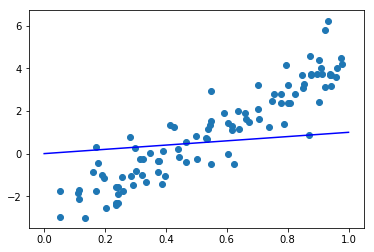

In [10]:
## Replace with your estimates
w_0, w0_0 = 1, 0
plot_1D(w_0, w0_0, x_0, y_0)

print "Loss:\t{}".format(dataset_loss(w_0, w0_0, x_0, y_0))

Loss:	1160.39156526


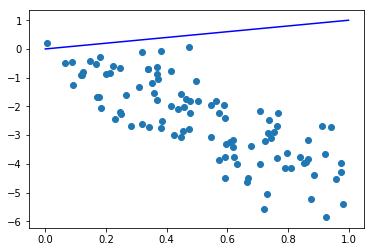

In [11]:
## Replace with your estimates
w_1, w0_1 = 1, 0
plot_1D(w_1, w0_1, x_1, y_1)

print "Loss:\t{}".format(dataset_loss(w_1, w0_1, x_1, y_1))

Loss:	9077.30425873


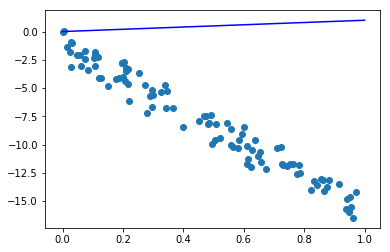

In [12]:
## Replace with your estimates
w_2, w0_2 = 1, 0
plot_1D(w_2, w0_2, x_2, y_2)

print "Loss:\t{}".format(dataset_loss(w_2, w0_2, x_2, y_2))

<h1> Optimization </h1>
In this part of the exercise, we'll learn the basics of how we can find the best weights using <it>optimization</it>. Optimization in mathematics is the problem of finding the smallest (or biggest) value of some function. So, if we have a function <b>f(x)</b>, then optimizing this function will find a value for <b>x</b> so that <b>f(x)</b> is as small as possible. We will try to solve linear regression by finding a set of weights that minimize the loss we incur across the entire data set. 

First, we'll start with something simpler: minimizing a quadratic function. 

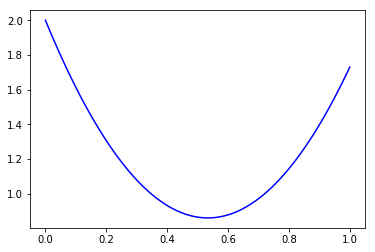

In [13]:
## First, we need to implement a parabola
def parabola(a, b, c, x):
    """
    compute the quadratic function y(x) = ax^2 + bx + c
    """
    return a * np.power(x, 2) + b * x + c

## some initial values for a, b, c
a, b, c = 4, -4.27, 2
f = lambda x: parabola(a, b, c, x)
plot_f(f)

The easiest way to minimize a function like this is to use brute force. We can't try every value of x, but we can try enough that we'll be close to the right answer.

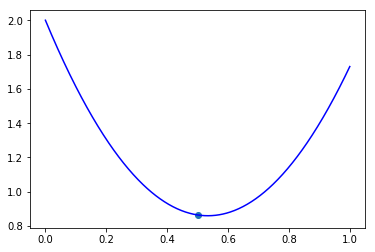

In [14]:
def minimize_discrete_1(f, x_min, x_max, delta):
    """Replace with your code"""
    x = x_min
    best = x, f(x)
    while x < x_max:
        x = x + delta
        y = f(x)
        if y < best[1]:
            best = (x, y)
    return best
opt_x, opt_y = minimize_discrete_1(f, 0, 1, 1e-1)
plot_f(f, [opt_x], [opt_y])

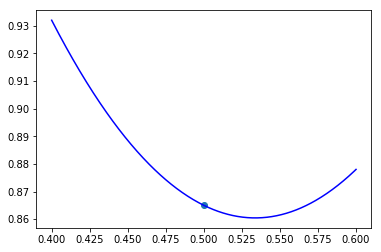

In [15]:
## If we zoom in, we can see that this answer is not perfect
plot_f(f, [opt_x], [opt_y], (.4, .6))

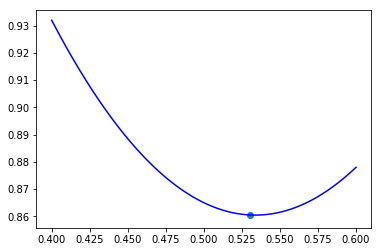

In [16]:
## We can do better by making the step size smaller
opt_x, opt_y = minimize_discrete_1(f, 0, 1, 1e-2)
plot_f(f, [opt_x], [opt_y], (.4, .6))

We can check how accurate this is by taking advantage of the fact that minimizing a quadratic function can be done analytically. From this, we can compare the solution we get from our optimizer with the exact minimum for a bunch of different step sizes. In the next cell, we use some simple timing code to generate a plot of running time vs accuracy. 

delta: 0.1	time: 8.29696655273e-05	 x distance: 0.03375	y distance: 0.00455625
delta: 0.01	time: 0.000262975692749	 x distance: 0.00375	y distance: 5.62499999999e-05
delta: 0.001	time: 0.00207901000977	 x distance: 0.00025	y distance: 2.50000000035e-07
delta: 0.0001	time: 0.020839214325	 x distance: 4.99999999576e-05	y distance: 9.99999993923e-09
delta: 1e-05	time: 0.212625026703	 x distance: 2.05724326463e-13	y distance: 0.0
delta: 1e-06	time: 2.2417140007	 x distance: 5.48905365605e-12	y distance: 2.22044604925e-16


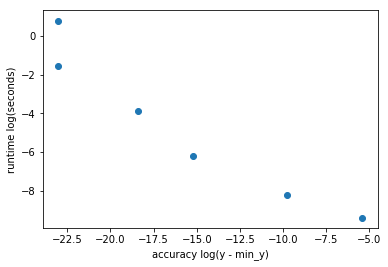

In [17]:
def minimize_analytic(a, b, c):
    return -b / (2*a)

## But eventually doing better will take longer
deltas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

min_x = minimize_analytic(a, b, c)
min_y = f(min_x)

times, subopts = [], []

for delta in deltas:
    start = time.time()
    x, y = minimize_discrete_1(f, 0, 1, delta)
    time_taken = time.time() - start
    times.append(np.log(time_taken))
    
    subopt = y - min_y
    ## making sure we don't feed a 0 into the log
    subopts.append(np.log(np.maximum(subopt, 1e-10)))
    print "delta: {}\ttime: {}\t x distance: {}\ty distance: {}".format(
        delta, time_taken, np.abs(x - min_x), np.abs(y - min_y))
    
plt.scatter(subopts, times)
plt.ylabel('runtime log(seconds)')
plt.xlabel('accuracy log(y - min_y)')

This is our baseline. Our goal is to figure out how to get the same level of optimality in less time or to do better in the same amount of time. The first thing we can do is figure out if we can terminate early. This is a parabola, so, if the function is <it>increasing</it> at the current value, then it will never go down again. We can check this and use this fact to terminate our search early.

In [18]:
def check_increasing_discrete(f, x, delta):
    """Return True if the next value checked in minimize_discrete 
    will increase"""
    """Replace with your code"""
    return f(x) < f(x + delta) 

def minimize_discrete_2(f, x_min, x_max, delta):
    """
    modify your implementation of minimize_discrete_1 to use check_increasing_discrete
    and terminate early
    """
    """Replace with your code"""
    x = x_min
    best = x, f(x)
    while not check_increasing_discrete(f, x, delta) and x < x_max:
        x = x + delta
        y = f(x)
        if y < best[1]:
            best = (x, y)
    return best

Now we will see how much better we have done! One important thing to pay attention to is that we want to make sure we can minimize <it>many<\it> different functions. We'll use some random values for a, b, and c to test our improvement. 

In [19]:
times_1 = []
subopts_1 = []

times_2 = []
subopts_2 = []

speedups = []
delta_list = []

## use fewer delta values so it doesn't take forever :)
deltas = [1e-1, 1e-2, 1e-3, 1e-4]
for i in range(100):
    ## need a to be positive for minimization to make sense
    a = np.abs(np.random.normal())
    b = np.random.normal()
    c = np.random.normal()
    f = lambda x: parabola(a, b, c, x)
    min_x = minimize_analytic(a, b, c)
    min_y = f(min_x)
    for delta in deltas:
        t_0 = time.time()
        x_1, y_1 = minimize_discrete_1(f, -2, 2, delta)
        t_1 = time.time()
        x_2, y_2 = minimize_discrete_2(f, -2, 2, delta)
        t_2 = time.time()
        subopt = np.maximum(np.abs(y_1 - min_y), 1e-10)
        subopts_1.append(np.log(subopt))
        times_1.append(np.log(t_1 - t_0))
        
        subopt = np.maximum(np.abs(y_2 - min_y), 1e-10)
        subopts_2.append(np.log(subopt))
        times_2.append(np.log(t_2 - t_1))
        
        speedups.append((t_1 - t_0) - (t_2 - t_1))
        delta_list.append(delta)
        #print x_1, x_2, min_x, min_y, t_1 - t_0 - t_2 + t_1

Average Speedup: -0.00696835577488	Max: 0.0689949989319


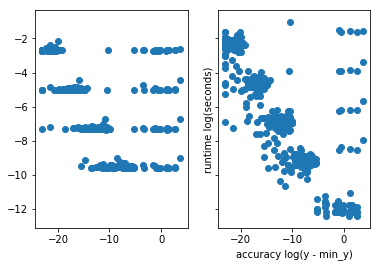

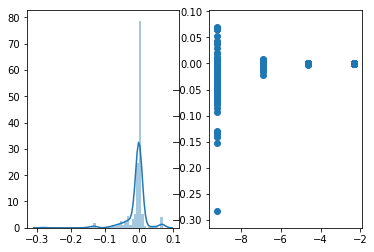

In [20]:
## plot the results side-by-side
fig, axes = plt.subplots(1, 2, sharey=True)
plt.sca(axes[0])
plt.scatter(subopts_1, times_1)
plt.sca(axes[1])
plt.scatter(subopts_2, times_2)
plt.ylabel('runtime log(seconds)')
plt.xlabel('accuracy log(y - min_y)')


fig1, axes1 = plt.subplots(1, 2)
speedups = np.array(speedups)
plt.sca(axes1[0])
sns.distplot(speedups)
plt.sca(axes1[1])
plt.scatter(np.log(delta_list), speedups)

print "Average Speedup: {}\tMax: {}".format(np.mean(speedups), np.max(speedups))

Well, that's not good, we got faster in some cases, but slower in others. The reason is that we are always doing fewer checks, but each iteration of the search takes longer. This is a common tradeoff when trying to write optimization code. Usually we can make our algorithm 'smarter' so it takes fewer steps ---  but that means that each step will take more time. 

Time to try something new! What's really making us slow up above is that we only take a small step each iteration. If we want good accuracy we need to make the step size small. What we'll try next is to take different sized steps at each iteration. The intuition we'll us is this: if the function is increasing rapidly, then we'll take a big step; but, if it is increasing slowly, then we are close to the bottom and we should take a small step. 

In [21]:
## First, we'll need a different convergence check to see if we are at the minimum. 
## This time, we'll check explicitly to see if the value is a minimum by comparing against 
## its neighbors. 
def is_min_discrete(f, x, delta):
    """Compute the function value at x+delta and x-delta and compare those values
    with f(x). Return true if f is increasing in both directions."""
    v = f(x)
    v_lo = f(x-delta)
    v_hi = f(x+delta)
    return v <= v_lo and v <= v_hi

## Next, we'll compute the amount to increase (or decrease) x.
## The step size that we'll use is the average slope. This is (f(x+delta) - f(x-delta))/(2delta)
## We'll use the hyperparameter to alpha control how sensitive we are to the slope
## alpha is a hyperparameter that allows us to control how quickly we will move
## NOTE: this is positive when f is increasing and negative when f is decreasing
## so we always want to move in the opposite direction of this value
def step_size(f, x, alpha, delta):
    v = f(x)
    v_lo = f(x-delta)
    v_hi = f(x+delta)
    return alpha * (v_hi - v_lo)/(2*delta)

## Next, we can write our third version of minimize_discrete
def minimize_discrete_3(f, x_init, alpha, delta):
    """
    modify your implementation of minimize_discrete_2 to use is_min_discrete for termination
    and step_size to use an adaptive step size. 
    """
    """Replace with your code"""
    x = x_init
    best = x, f(x)
    while not is_min_discrete(f, x, delta):
        x = x - step_size(f, x, alpha, delta)
        y = f(x)
        if y <= best[1]:
            best = (x, y)
    return best

In [22]:
times_1 = []
subopts_1 = []

times_3 = []
subopts_3 = []

speedups_3 = []
delta_list = []

## use fewer delta values so it doesn't take forever :)
deltas = [1e-1, 1e-2, 1e-3, 1e-4]
for i in range(100):
    ## need a to be positive for minimization to make sense
    a = np.abs(np.random.normal())
    b = np.random.normal()
    c = np.random.normal()
    f = lambda x: parabola(a, b, c, x)
    min_x = minimize_analytic(a, b, c)
    min_y = f(min_x)
    start = time.time()
    x_3, y_3 = minimize_discrete_3(f, 0, 1e-1, 1e-5)
    t_3 = time.time() - start
    subopt = np.maximum(np.abs(y_3 - min_y), 1e-10)
    #print x_3, y_3, t_3, subopt
    subopts_3.append(np.log(subopt))
    times_3.append(np.log(t_3))
    for delta in deltas:
        t_0 = time.time()
        x_1, y_1 = minimize_discrete_1(f, -2, 2, delta)
        t_1 = time.time()

        subopt = np.maximum(np.abs(y_1 - min_y), 1e-10)
        subopts_1.append(np.log(subopt))
        times_1.append(np.log(t_1 - t_0))
        
        #print x_1, y_1, t_1 - t_0, subopt
        speedups_3.append((t_1 - t_0) - (t_3))
        delta_list.append(delta)
        #print x_1, x_2, min_x, min_y, t_1 - t_0 - t_2 + t_1

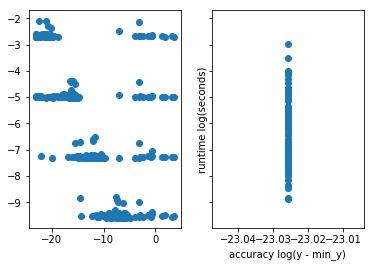

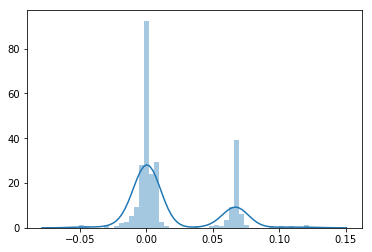

In [23]:
## plot the results side-by-side
fig, axes = plt.subplots(1, 2, sharey=True)
plt.sca(axes[0])
plt.scatter(subopts_1, times_1)
plt.sca(axes[1])
plt.scatter(subopts_3, times_3)
plt.ylabel('runtime log(seconds)')
plt.xlabel('accuracy log(y - min_y)')


fig1, axes1 = plt.subplots(1, 1)
speedups_3 = np.array(speedups_3)
#speedups_3_clipped = speedups_3.copy()
#speedups_3_clipped[speedups_3_clipped > .05] = .05
#speedups_3_clipped[speedups_3_clipped < -.05] = -.05
plt.sca(axes1)
sns.distplot(speedups_3)

Hooray! This looks a lot better. First, we can see that we pretty much always do perfectly on accuracy. The top left graph is entirely clustered on a single suboptimality value. The next thing is that we almost never get a worse running time. There are a couple outliers, most values in the histogram should be positive (or at least close to 0). Futhermore, we sometimes get very large speeds ups (a tenth of a second). 

We've now arrived at a discretized version of a classic optimization method called <it>gradient descent</it>. A gradient is a tool from calculus that allows us to measure the slope of a function at a particular point. For now, we can just think about it as the behavior of step_size with a very very small delta. For many functions, we can compute gradients exactly. For the parabola <b>f(x) ax^2 + bx + c</b> the gradient is <b>df(x) = 2ax + b</b>. We can use this to implement and test gradient descent. 

In [24]:
## First, define the gradient of a parabola
def d_quad_dx(a, b, c, x):
    return 2*a*x + b

## We will also use the gradient for convergence. 
## If the next step we will take is going to be small, then we 
## know we are close to optimal. We'll take the derivative of f as an input.
## We will say that we have found an answer if the magnitude of the derivative |df(x)| 
## is less than epsilon
def is_min_grad(x, df, eps):
    #print '\r', np.linalg.norm(df(x)), 
    return np.linalg.norm(df(x)) <= eps

## Now we're ready to implement gradient descent. Modify your
## implementation of minimize_discrete_3 to use a derivative
## for the step size and convergence check. To keep things simple, we'll
## take df, the derivative function, as an input. 
def gradient_descent(f, df, x_init, alpha, eps):
    x = x_init
    while not is_min_grad(x, df, eps):
        x = x - alpha * df(x)
    return x, f(x)

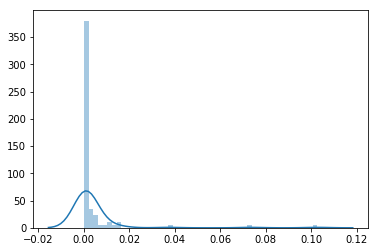

In [25]:
speedups = []

for i in range(100):
    ## need a to be positive for minimization to make sense
    a = np.abs(np.random.normal())
    b = np.random.normal()
    c = np.random.normal()
    f = lambda x: parabola(a, b, c, x)
    df = lambda x: d_quad_dx(a, b, c, x)
    min_x = minimize_analytic(a, b, c)
    min_y = f(min_x)
    t_0 = time.time()
    x_0, y_0 = minimize_discrete_3(f, 0, 1e-1, 1e-5)
    t_1 = time.time()
    x_1, y_1 = gradient_descent(f, df, 0, 1e-1, 1e-8)
    t_2 = time.time()
    time_discrete = t_1 - t_0
    time_analytic = t_2 - t_1
    speedup = time_discrete - time_analytic
    speedups.append(speedup)
    
fig1, axes1 = plt.subplots(1, 1)
speedups = np.array(speedups)
plt.sca(axes1)
sns.distplot(speedups)

Good news again! In most trials we should see a small speed improvement and in a few we see a large improvement. The small improvment overall is because we've actually made each iteration faster. Computing the exact derivative is faster than computing an approximation. This speeds up the convergence check and the step size computation. The large improvement come from places where the approximation caused the algorithm to make mistakes --- using the exact derivative fixes this problem.

Now, we can go back to our linear regression problem and use the gradient descent function we wrote to fit some lines! We just need to figure out what to make <b>f</b> and <b>x</b>. Remember that our goal is to determine a linear function that can represent a set of (x, y) pairs. We use a loss function to measure how good each guess is. Thus, we can use the loss summed across the dataset (dataset_loss from before) as our function to minimize. We are minimizing this over the different choices of w0 and w.

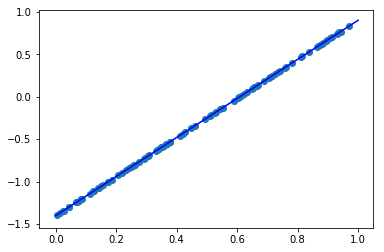

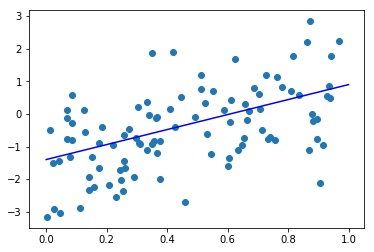

In [26]:
## First we'll try this out with a particular set of weights
w, w0 = 2.3, -1.4

x_vals = np.random.rand(100)
## compute y values for each x value
y_vals = np.array([hypothesis(w, w0, x) for x in x_vals])
## noise to add to our data
e_vals = np.random.normal(size=100)
noisy_y_vals = y_vals + e_vals

## plot the clean data
plot_1D(w, w0, x_vals, y_vals)

## plot the noisy data
plot_1D(w, w0, x_vals, noisy_y_vals)

In [27]:
## We need to compute the gradient of dataset_loss with respect to the weights. 
## To do this, one useful trick is that if we have a function that is a sum of other function,
## then its derivative is the sum of the derivatives. 
## In other words: if f(x) = g(x) + h(x), then df(x) = dh(x) + dg(x).
## dataset_loss is a sum of quadratic function, so we can use d_quad_loss_dw to compute this gradient

def d_quad_loss_dw(w, w0, x, y):
    y_guess = w * x + w0
    return 2 * (y_guess - y) * np.array([x, 1])

## Note: the gradient has two dimensions (because there are two variables that describe our weights [w, w0]).
## Make sure you are dealing with that correctly!
def d_dataset_loss_dw(w, w0, x_vals, y_vals):
    """Replace with your code"""
    grad = np.array([0., 0.])
    for x, y in zip(x_vals, y_vals):
        grad += d_quad_loss_dw(w, w0, x, y)
    return grad

True Weights: 2.3, -1.4	 Inferred Weights: 2.2999999331, -1.39999996708


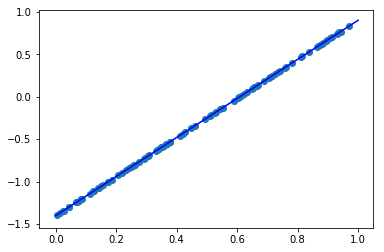

In [28]:
## Now we can use our gradient descent function to fit weights to our data!

## This time the variable has two dimensions to it, instead of 1
w_init = np.array([0, 0])

## First we'll try fitting to the clean data to make sure everything is working correctly
f_clean = lambda x: dataset_loss(x[0], x[1], x_vals, y_vals)
df_clean = lambda x: d_dataset_loss_dw(x[0], x[1], x_vals, y_vals)

(w_clean, w0_clean), l = gradient_descent(f_clean, df_clean, w_init, 1e-3, 1e-6)

plot_1D(w_clean, w0_clean, x_vals, y_vals)

print "True Weights: {}, {}\t Inferred Weights: {}, {}".format(w, w0, w_clean, w0_clean)

True Weights: 2.3, -1.4	 Inferred Weights: 2.33300441927, -1.54044648376
True Weights Loss: 114.176218294	 Inferred Weights Loss: 112.597569576


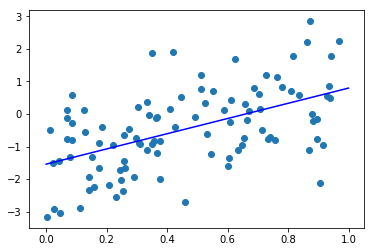

In [29]:
## Now we can try it with the noisy data
f_noisy = lambda x: dataset_loss(x[0], x[1], x_vals, noisy_y_vals)
df_noisy = lambda x: d_dataset_loss_dw(x[0], x[1], x_vals, noisy_y_vals)

(w_noisy, w0_noisy), l = gradient_descent(f_noisy, df_noisy, w_init, 1e-3, 1e-8)

plot_1D(w_noisy, w0_noisy, x_vals, noisy_y_vals)


print "True Weights: {}, {}\t Inferred Weights: {}, {}".format(w, w0, w_noisy, w0_noisy)
print "True Weights Loss: {}\t Inferred Weights Loss: {}".format(f_noisy([w, w0]), f_noisy([w_noisy, w0_noisy]))

<h1> (Over-)Fitting Polynomials </h1> 

So, now we can fit linear functions to data. This is great for all sorts of applications, but what if the real problem we're trying to model isn't linear? Lots of relationships that we can find the world are complicated and linear functions just won't cut it. In the next part of the exercise, we'll see how we can use linear regression to fit more complicated functions to our data. 

First, we'll need a non-linear source of data. We'll use polynomials to get started.


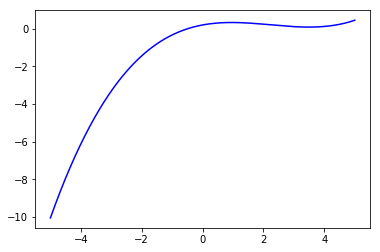

In [30]:
## Implement polynomial_1D(w, x)
def polynomial(w, x):
    """Compute w[0] + w[1] * x + w[2] * x^2 ... + w[n] * x^n"""
    res = 0
    for i, w in enumerate(w):
        res += w * np.power(x, i)
    return res

poly_weights = np.array([2, 3, -2, .3]) / 10
poly_w = lambda x: polynomial(poly_weights, x)
plot_f(poly_w, x_lim=(-5, 5))

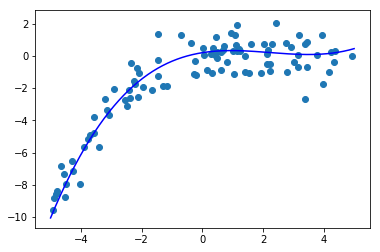

In [31]:
## Now that we can compute polynomials, we can create a noisy dataset --- just like we did before

def generate_dataset(w_true, x_vals):
    """
    Compute a list of noisy y values by first computing the polynomial 
    at each x in the list x_vals and then adding noise
    """
    res = []
    for x in x_vals:
        y = polynomial(w_true, x)
        y += np.random.normal()
        res.append(y)
    return res

## Let's sample some data and plot it

## use data from the range (-5, 5) instead of (0, 1)
N = 100
x_vals_poly = 10 * (np.random.rand(N) - .5)
noisy_y_vals_poly = generate_dataset(poly_weights, x_vals_poly)

plot_f(poly_w, x_vals=x_vals_poly, y_vals=noisy_y_vals_poly, x_lim=(-5, 5))

Now that we have data, we can try to recover the correct weights. The only problem is that the function we're using to generate data is in non-linear in x. First, we can just see what happens if we do linear regression. 

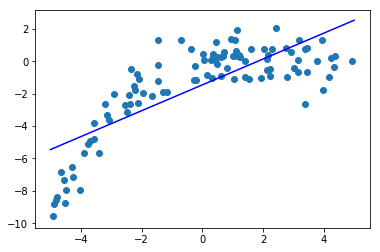

In [32]:
## Now we can try it with the noisy data
loss = lambda x: dataset_loss(x[0], x[1], x_vals_poly, noisy_y_vals_poly)
dloss = lambda x: d_dataset_loss_dw(x[0], x[1], x_vals_poly, noisy_y_vals_poly)

(w_noisy, w0_noisy), l = gradient_descent(loss, dloss, w_init, 1e-3, 1e-8)

plot_1D(w_noisy, w0_noisy, x_vals_poly, noisy_y_vals_poly, x_lim=(-5, 5))

What we can see is that linear regression does it's best to match the data and balance out the errors, but it just can't represent the curves in the data. 

In order to deal with this, our first step will be to look at <it>multi-dimensional</it> regression. So far we have been dealing with data where x is one dimensionsal, but in linear regression we can actually handle to case of multi-dimensional inputs just fine. This means that <b>x = [x_1, x_2, ..., x_n]</b>. A linear function will be defined by a list of n+1 weights <b>w = [w_0, w_1, ..., w_n]</b>. Our linear function now multipies each weight with the corresponding x value and then adds them together with w_0. <b>y(x) = w_0 + w_1 * x_1 + w_2 * x_2 + ... w_n * x_n</b>.

It is not hard to modify the gradient_descent function you wrote 
to handle high-dimensional weights. (Actually, you only need to change 
the gradient and loss functions.) However, doing it efficiently can be
challenging. Tomorrow, we'll make use of efficient implementations of gradient descent. For the next section, we'll use the analytic solution to least-squares, which uses linear algebra to exactly compute the best line.

You can ignore the <b>r</b> parameter --- we'll get to that shortly. 

In [33]:
def least_squares(x_vals, y_vals, r=0):
    """
    Computes the exact solution to regularized least squares
    w = (X'X + r*I)^-1 X'Y
    """
    X = np.array(x_vals)
    Y = np.array(y_vals)
    N, d = X.shape
    x_bar = np.mean(X, axis=0)
    y_bar = np.mean(Y)
    X_c = X - x_bar
    Y_c = Y - y_bar
    X = np.c_[np.ones(N), X]
    w = np.linalg.solve(X_c.T.dot(X_c) + r * np.eye(d), X_c.T.dot(Y_c))
    loss = np.linalg.norm(X_c.dot(w) - Y_c)/N
    w0 = y_bar - x_bar.dot(w)
    w = np.r_[w0, w]
    return w, loss


Now that we can fit linear functions to high-dimensional data, we can use this to do polynomial regression! The trick is to recognize that fitting a polynomial function to one-dimensional data is the same as fitting a linear function to a very particular dataset. Instead of have a one dimensional input <b>x</b> we can replace it with a multi-dimensional input <b>[x, x^2, x^3, x^4,...]</b>. Once we've done this, we can fit weights to this data and we will have learned the coefficients of our polynomial! This trick, replacing <b>x</b> with a high-dimensional function of <b>x</b>, is called <it>featurization</it>. It is a common technique at the core of a lot of machine learning applications.

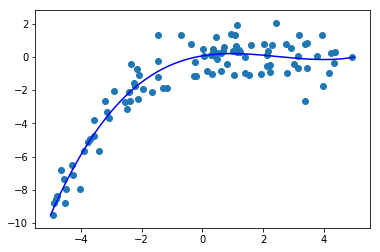

In [34]:
## First, we need to write a function to compute the high-dimensional features for a 
## dataset x
def compute_poly_features(x_vals, n):
    """
    Input: a list of one dimensional x values [x_i]
    Output: a list of lists, where the ith list is the powers of x_i up to n
            [x_i, x_i^2, ..., x_i^n]
    """
    res = []
    for x in x_vals:
        l_i = []
        for j in range(1, n+1):
            l_i.append(np.power(x, j))
        res.append(l_i)
        #print l_i
    return res

## Now we can compute some polynomial features for our data
x_vals_poly_nd = compute_poly_features(x_vals_poly, 3)
## Once we have that, we're all set to do polynomial regression!

w_inferred, l = least_squares(x_vals_poly_nd, noisy_y_vals_poly)

poly_inferred = lambda x: polynomial(w_inferred, x)
plot_f(poly_inferred, x_vals=x_vals_poly, y_vals=noisy_y_vals_poly, x_lim=(-5, 5))

Alright, now we can fit polynomials to data! One important detail is that we knew what type of function the data was sampled from. We already knew that the polynomial was a third degree polynomial so we knew the right type of features to compute. Next, we'll try to figure out what the right dimension is, given only the data as input. 

1 0.174297768646
3 0.0880942296535
5 0.0880453296742
9 0.08747721863


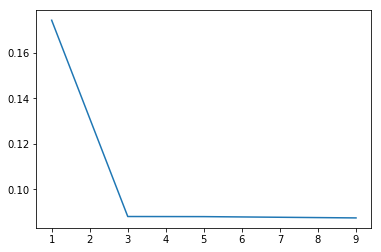

In [35]:
## First, we'll take a look at how well different types of polynomial features do on the data above

def fit_poly(x_vals, y_vals, n):
    """
    Compute a polynomial fit to the data
    Use a polynomial of degree n
    Generate a plot of the inferred function
    
    Return a pair of (loss, weights)
    """
    ## Hint: you should be able to adapt the code above
    x_vals_poly = compute_poly_features(x_vals, n)
    ## Once we have that, we're all set to do polynomial regression!
    #raw_input("go?")
    w_inferred, l = least_squares(x_vals_poly, y_vals)
    #poly_inferred = lambda x: polynomial(w_inferred, x)
    #plot_f(poly_inferred, x_vals=x_vals, y_vals=y_vals, x_lim=(-5, 5))
    
    return w_inferred, l


weights = []
losses = []
n_vals = [1, 3, 5, 9]
for n in n_vals:
    w_n, l_n = fit_poly(x_vals_poly, noisy_y_vals_poly, n)
    print n, l_n
    weights.append(w_n)
    losses.append(l_n)
    

plt.subplots(1, 1)    
plt.plot(n_vals, losses)
    

We can see an interesting phenomenon as we increase the degree of the polynomial that we fit. The loss always goes down as we make the polynomial more complicated. Basically, the story here is that the bigger polynomials can wiggle more --- so they do a better job of matching the wiggles in the data. Unfortunately, this isn't the whole story. We're measuring loss on the <it>training</it> data. What we want is an algorithm that does well on new data. If we look at the real polynomial that generated the data (with degree 3), and compare it with fit with degree 9, we can see that the results aren't very similar.

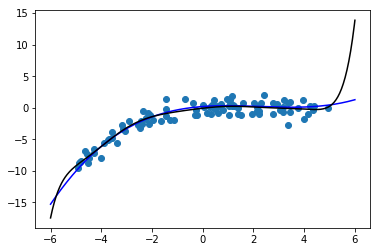

In [36]:
fig, ax = plt.subplots(1, 1)
poly_true = lambda x: polynomial(poly_w, x)
plot_f(poly_w, x_lim=(-6, 6), ax=ax, color='b', x_vals=x_vals_poly, y_vals=noisy_y_vals_poly)

poly_9 = lambda x: polynomial(weights[-1], x)
plot_f(poly_9, x_lim=(-6, 6), ax=ax, color='k')

What we can see is that the functions line up pretty well where there is lots of data, but very quickly they diverge in regions without data. This is called <b>overfitting</b> --- our function has the ability to wiggle a lot and so it is able to model small functuations in the data, noise. 

We can see an extreme version of this by trying to fit polynomials to very small amounts of data.

(-3, 3)

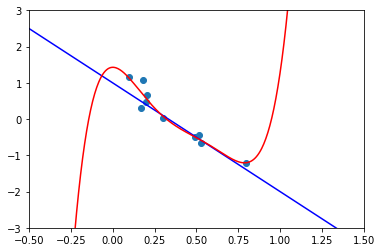

In [37]:
N=10
x_vals = np.random.rand(N)
w = [1, -3]
y_vals = x_vals * w[1] + w[0] + np.random.normal(size=N)/2
x_lim = [-.5, 1.5]
f_true = lambda x: polynomial(w, x)

fig, ax = plt.subplots(1, 1)
plot_f(f_true, x_vals=x_vals, y_vals=y_vals, ax=ax, color='b', x_lim=x_lim)

w_inferred, l_inferred = fit_poly(x_vals, y_vals, 5)

f_inferred = lambda x: polynomial(w_inferred, x)
plot_f(f_inferred, ax=ax, color='r', x_lim=x_lim)
ax.set_xlim(x_lim)
ax.set_ylim([-3, 3])

How can we avoid this issue?

The first thing we need to do is be able to figure out if we are overfitting in the first place. Just looking at performance on the training data isn't enough. As we make the possible functions more complicated, they can always do at least as well on the training set. Instead, we need a way to measure performance that the more expressive functions can't optimize on. 

One way to think about this is like studying for a math test in school. If you can see questions in advance, you can memorize all of the answers ahead of time. This lets you do well on the test, but you don't really learn the math. Instead, teachers will usually let you work on practice questions, but the test questions are new (although they are similar to the practice questions). We can do the same thing for linear regression. We take our dataset and we split it into two parts: a <it>training</it> set that we use to figure out good weights and a <it>validation</it> set that we use to figure out if those weights are overfitting. The training set behaves like the practice questions, and the validation set behaves like the actual test questions for our machine learning 'student'. 

Degree 1	Training Loss: 0.184517580706 Validation Loss: 0.101328490777
Degree 3	Training Loss: 0.165044086052 Validation Loss: 0.204671111515
Degree 5	Training Loss: 0.147518431359 Validation Loss: 0.252121338883


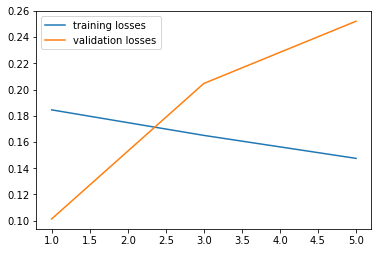

In [44]:
## Implement a function that takes as input a data set and splits it into a training set and a validation set
def split_dataset(x_vals, y_vals, n_validate):
    x_validate = x_vals[:n_validate]
    y_validate = y_vals[:n_validate]
    x_train = x_vals[n_validate:]
    y_train = y_vals[n_validate:]
    return x_validate, y_validate, x_train, y_train

def create_dataset(N):
    
    x_vals = np.random.rand(N)
    w = [1, -3]
    y_vals = x_vals * w[1] + w[0] + np.random.normal(size=N)/2
    x_lim = [-.5, 1.5]


    return split_dataset(x_vals, y_vals, int(np.round(N/3)))

x_validate, y_validate, x_train, y_train = create_dataset(15)

def validate_loss(w):
    l = 0
    for x, y  in zip(x_validate, y_validate):
        l += quad_loss(polynomial(w, x), y)
    return l/len(y_validate)

w_1, l_1 = fit_poly(x_train, y_train, 1)
lv_1 = validate_loss(w_1)
w_3, l_3 = fit_poly(x_train, y_train, 3)
lv_3 = validate_loss(w_3)
w_5, l_5 = fit_poly(x_train, y_train, 5)
lv_5 = validate_loss(w_5)

print "Degree 1\tTraining Loss: {} Validation Loss: {}".format(l_1, lv_1)
print "Degree 3\tTraining Loss: {} Validation Loss: {}".format(l_3, lv_3)
print "Degree 5\tTraining Loss: {} Validation Loss: {}".format(l_5, lv_5)

degree_vals = [1, 3, 5]
training_losses = [l_1, l_3, l_5]
validation_losses = [lv_1, lv_3, lv_5]
plt.plot(degree_vals, training_losses, label='training losses')
plt.plot(degree_vals, validation_losses, label='validation losses')
plt.legend()

You should run the cell above a couple of times. There are two patterns that you should see. 

First, the training loss always decreases from Degree 1 to Degree 3 and again from Degree 3 to Degree 5 --- this is because those functions are overfitting. There are more options for the optimization to choose from, so it does better on the training examples.

Second, the validation loss should usually increase from the bottom to the top. Occasionally, this won't be the case due to random chance but for the most part, the validation loss should increase as we make the model more complicated than the true source of the data. 

If we do this with more data though, we will see that these patterns largely go away. This is because there's enough data that the noise in the training set averages out. 

Degree 1	Training Loss: 0.0275242776019 Validation Loss: 0.217932956696
Degree 3	Training Loss: 0.0274500965315 Validation Loss: 0.218238141114
Degree 5	Training Loss: 0.0274285767987 Validation Loss: 0.218786864739


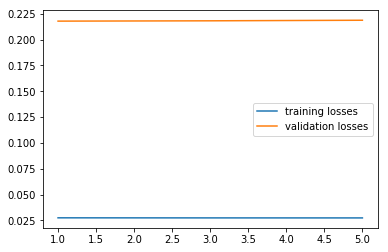

In [45]:
x_validate, y_validate, x_train, y_train = create_dataset(500)

def validate_loss(w):
    l = 0
    for x, y  in zip(x_validate, y_validate):
        l += quad_loss(polynomial(w, x), y)
    return l/len(y_validate)

w_1, l_1 = fit_poly(x_train, y_train, 1)
lv_1 = validate_loss(w_1)
w_3, l_3 = fit_poly(x_train, y_train, 3)
lv_3 = validate_loss(w_3)
w_5, l_5 = fit_poly(x_train, y_train, 5)
lv_5 = validate_loss(w_5)

print "Degree 1\tTraining Loss: {} Validation Loss: {}".format(l_1, lv_1)
print "Degree 3\tTraining Loss: {} Validation Loss: {}".format(l_3, lv_3)
print "Degree 5\tTraining Loss: {} Validation Loss: {}".format(l_5, lv_5)

degree_vals = [1, 3, 5]
training_losses = [l_1, l_3, l_5]
validation_losses = [lv_1, lv_3, lv_5]
plt.plot(degree_vals, training_losses, label='training losses')
plt.plot(degree_vals, validation_losses, label='validation losses')
plt.legend()

Now that we can measure overfitting, we can try to deal with it. In some cases, we can directly change the model class to regularize. For example, we could search to find the degree of polynomial that does well for the validation loss. This is OK, but doesn't work everywhere. In modern machine learning applications we sometimes have 1000 (!) dimensional inputs --- this often means we can overfit even with linear functions.

Instead, we'll need a more general way to control for overfitting. We can get a hint by looking at the weights that we compute when we overfit. Run the next cell a couple of times to look for patterns. 

In [46]:
x_validate, y_validate, x_train, y_train = create_dataset(15)

w_1, l = fit_poly(x_train, y_train, 1)
w_3, l = fit_poly(x_train, y_train, 3)
w_5, l = fit_poly(x_train, y_train, 5)

print "Degree 1: {}".format(w_1)
print "Degree 3: {}".format(w_3)
print "Degree 5: {}".format(w_5)


Degree 1: [ 1.34864439 -3.27146295]
Degree 3: [ 1.41014999 -5.44425649  8.41350727 -6.85993901]
Degree 5: [   2.26068346  -19.96897187   77.07743055 -135.41641234  101.89410971
  -28.1450957 ]


What you should see is that the weights that overfit have very large magnitudes. So, one way to control for overfitting is to create a penalty for using big weights. This way the optimization will have to choose: if it helps to explain the data, then it will incur a cost for large weights; but, if it is possible to model the data with small weights, then the optimization will choose that. This technique is called <it>regularization</it>. 

If we go back to the definition of least_squares, this is what the parameter <b>r</b> is for. Our optimization is going to trade off between the training loss and the sum of squared weights: <b>w_0^2 + w_1^2 + ... w_n^2</b>. <b>r</b> controls the trade-off between these two terms. If <b>r</b> is large, then the optimization will focus on keeping the weights small; if <b>r</b> is small, then the optimization will focus on fitting the training data. 

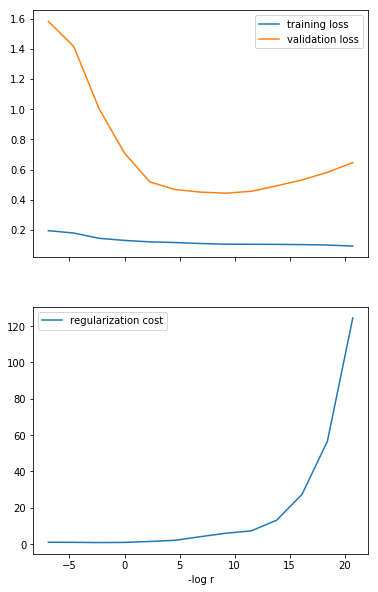

In [47]:
x_validate, y_validate, x_train, y_train = create_dataset(30)
x_train_poly = compute_poly_features(x_train, 15)

def validate_loss(w):
    l = 0
    for x, y  in zip(x_validate, y_validate):
        l += quad_loss(polynomial(w, x), y)
    return l/len(y_validate)

r_vals = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
loss_t = []
loss_v = []
w_squared = []
for r in r_vals:
    w, l = least_squares(x_train_poly, y_train, r=r)
    loss_t.append(l)
    loss_v.append(validate_loss(w))
    w_squared.append(np.sqrt(np.linalg.norm(w)))
fig, ax = plt.subplots(2, 1, sharex=True)
plt.sca(ax[0])
plt.plot(-np.log(r_vals), loss_t, label='training loss')
plt.plot(-np.log(r_vals), loss_v, label='validation loss')
plt.legend()
plt.sca(ax[1])
plt.plot(-np.log(r_vals), w_squared, label='regularization cost')
plt.legend()
ax[1].set_xlabel('-log r')
fig.set_figheight(10)

#print loss_t
#print loss_v

Now, we can try out what we've learned on some real data! 

In this case, we'll be using one of the datasets from the <a href="http://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a>. They have a variety of real world datasets that you can use to try out machine learning algorithms. 

We'll be looking at a prediction problem related to <a href="http://archive.ics.uci.edu/ml/datasets/Energy+efficiency">energy efficiency</a>. One of the biggest energy costs in a home comes from heating and cooling. Where a house is built can change the heating and cooling costs a lot. For example, a house built largely in the shade away from direct sunlight will cost less to air condition in the summer. 

Your job is to build a tool that allows architects to figure out the heating and cooling costs based on some features of a proposed home design. You have access to 8 features:

X1	Relative Compactness

X2	Surface Area 

X3	Wall Area 

X4	Roof Area 

X5	Overall Height 

X6	Orientation 

X7	Glazing Area 

X8	Glazing Area Distribution

Our goal will be to predict the cooling load. This will tell us how expensive cooling this particular house is likely to be. We've collected 100 training examples and your job will be to train a predictor for these two values. 

We'll start by predicting the heating load. We've written code to load the data and compute the training loss. You need to figure out our to regularize our prediction --- experiment with different choices to find the best value of <b>r</b>. Try out a couple of different values in order to get a better validation loss. You'll need to try a big range of values. Consider values for <b>r</b> in the range [1e6, 1e-6]. 

In [48]:
## Load in the data
X, Y = load_ee_training()

## Split the data in to train and validation sets
X_validate, Y_validate, X_train, Y_train  = split_dataset(X, Y, int(len(Y)/5))

def predict(w, x):
    return w.dot(np.r_[1, x])

def training_loss(w):
    l = 0
    for x, y in zip(X_train, Y_train):
        l += quad_loss(predict(w, x), y)
    return l/len(Y_train)

def validate_loss(w):
    l = 0
    for x, y  in zip(X_validate, Y_validate):
        #print predict(w, x), y, quad_loss(predict(w, x), y)
        l += quad_loss(predict(w, x), y)
    return l/len(Y_validate)

## Replace with your value for r
r = 1e-4
w, _ = least_squares(X_train, Y_train, r = r)
lt = training_loss(w)
lv = validate_loss(w)
print "Training Loss:\t{}\tValidation Loss:\t{}".format(lt, lv)

Training Loss:	1.08577270053	Validation Loss:	14.390692937


Try the above section out for a variety of values for <b>r</b> above. Your goal is to find a value that gets a low validation loss. 

Once you're happy with that, you can run the next cell to verify your performance on the <b>test set</b>. This is the final set of data that we'll use to evaluate our learning algorithm. This is where we pretend that we are getting new data entirely and so we can only evaluate on it once. (Otherwise, we might somehow cheat and use our hyperparameters to 'overfit' to the testing set!) You can run the next cell once to see how well you've tuned your linear regression. 

Good luck!

In [49]:
## Train on the whole dataset
w, lt = least_squares(X_train, Y_train, r = r)

l = 0
for i in range(len(X_train)):
    l += np.power(predict(w, X_train[i]) - Y_train[i], 2)/len(X_train)

testing_loss = ee_evaluate(w)
print "Testing Loss:\t{}".format(testing_loss)

Testing Loss:	9.031410527
